In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [2]:
data = pd.read_csv("topCharts_continuous.csv", index_col= 0)


In [3]:
cluster_df = pd.DataFrame(columns = ["Artist", "Title", "Tempo", "Valence", "Danceability", "Energy","Acousticness", "Instrumentalness"])


for a in data["Artist"].unique():
    df_a = data[data["Artist"] == a]
    for s in df_a["Title"].unique():
        df_as = df_a[df_a["Title"] == s]
        cluster_df.loc[len(cluster_df)] = df_as.iloc[0,:]


In [4]:
mms = MinMaxScaler()
cluster_values = cluster_df.iloc[:,2:]
mms.fit(cluster_values)
data_transformed = mms.transform(cluster_values)

In [5]:
inertias = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i).fit(data_transformed)
    inertias.append(kmeans.inertia_)
print(inertias)

[729.4363942996962, 514.1937394426532, 414.0599608525691, 362.34521745517736, 326.0699652359146, 296.5156086904251, 277.43594466223055, 260.85529134309314, 245.2773737758492, 231.5796860280369, 221.32023517397758, 212.15568181533476, 206.08782030426386, 199.06378835576191, 193.3699417386369, 188.14940363266135, 181.56958192459456, 179.31017202147464, 173.73250106549446]


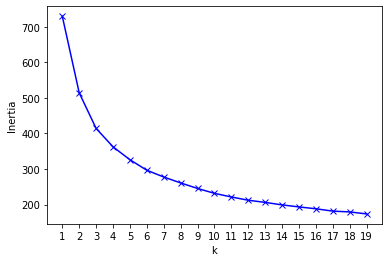

In [6]:
plt.plot(range(1,len(inertias)+1), inertias, "bx-")
plt.xlabel('k')
plt.ylabel("Inertia")
plt.xticks(range(1,len(inertias)+1))
plt.show()
#k=9

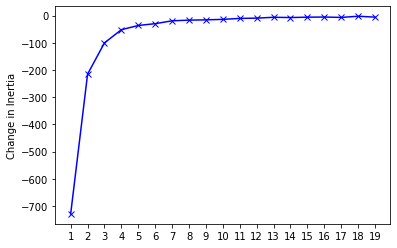

In [7]:
diffs = np.array(inertias[1:]) - np.array(inertias[:len(inertias)-1])
plt.plot(range(1,len(inertias)+1), [-inertias[0]] + list(diffs),"bx-")
plt.ylabel("Change in Inertia")
plt.xticks(range(1,len(inertias)+1))

plt.show()

In [8]:
kmeans_opt = KMeans(n_clusters = 10).fit(data_transformed)

In [9]:
labels = kmeans_opt.labels_
cluster_df["Label"] = labels

In [10]:
print(cluster_df[cluster_df["Label"] == 0].head())
print()
print(cluster_df[cluster_df["Label"] == 9].head())

         Artist           Title    Tempo  Valence  Danceability  Energy  \
5   Post Malone   White Iverson  130.098    0.309         0.675   0.562   
9   Post Malone        Paranoid  159.914    0.253         0.625   0.536   
22  Post Malone  Blame It On Me  121.873    0.274         0.652   0.591   
47       G-Eazy           Power   97.953    0.261         0.839   0.743   
55     Lil Pump    Drug Addicts  142.064    0.210         0.933   0.488   

    Acousticness  Instrumentalness  Label  
5         0.2330          0.000000      0  
9         0.0380          0.000023      0  
22        0.1450          0.000006      0  
47        0.1680          0.000051      0  
55        0.0106          0.001070      0  

         Artist                               Title    Tempo  Valence  \
14  Post Malone                    Zack And Codeine  138.039    0.386   
23  Post Malone                        Sugar Wraith  164.020    0.307   
34  Post Malone  Die For Me (feat. Future & Halsey)  145.010    0

In [11]:
pm = cluster_df[cluster_df["Artist"] == "Post Malone"].loc[:,["Title","Label"]]
pm.sort_values(by = "Label", inplace = True)
pm

,Title,Label
22,Blame It On Me,0
5,White Iverson,0
9,Paranoid,0
21,92 Explorer,1
20,Otherside,2
28,Goodbyes (Feat. Young Thug),2
11,Spoil My Night (feat. Swae Lee),2
10,Better Now,2
39,I'm Gonna Be,2
4,Go Flex,2


In [12]:
groups ={}
counters = {}
for i in range(10):
    groups[i] = cluster_df[cluster_df["Label"] == i]
    counters[i] = Counter(groups[i]["Artist"])

In [13]:
g = groups[1]
list(g[g["Artist"] == "Post Malone"]["Title"])

['92 Explorer']

In [14]:
def getClusterSongs(cluster_num, groups = groups, counters = counters, artists = [], n_artists = 3):
    cnt = counters[cluster_num]
    grp = groups[cluster_num]
    artsong = {}
    if artists:
        assert(set(artists).issubset(set(cnt.keys())))
    else:
        artists = [a[0] for a in cnt.most_common(n_artists)]
    for artist in artists:
        artsong[artist] = list(grp[grp["Artist"] == artist]["Title"])
    return artsong   

In [15]:
getClusterSongs(1)

{'Logic': ['Contra',
  'Overnight',
  'Indica Badu',
  'The Return',
  'Everybody Dies',
  'Wu Tang Forever (ft. Ghostface Killah, Raekwon, RZA, Method Man, Inspectah Deck, Cappadonna, Jackpot Scotty Wotty, U-God, Masta Killa, GZA)',
  'YSIV',
  'Ordinary Day (ft. Hailee Steinfeld)',
  'The Adventures Of Stoney Bob (ft. Kajo, Slaydro, Big Lenbo)',
  'Last Call',
  'Keanu Reeves',
  'Homicide',
  'Homicide (feat. Eminem)',
  'clickbait',
  'Wannabe',
  'Still Ballin (feat. Wiz Khalifa)',
  'Cocaine',
  'Limitless',
  'BOBBY (feat. My Dad)'],
 'DaBaby': ['Suge',
  'Goin Baby',
  'BOP',
  'VIBEZ',
  'RAW SHIT (feat. Migos)',
  'GOSPEL (feat. Chance The Rapper, Gucci Mane & YK Osiris)',
  'POP STAR (feat. Kevin Gates)',
  'XXL',
  'PROLLY HEARD',
  'THERE HE GO'],
 'BTS': ['DNA',
  'Airplane pt.2',
  '134340',
  'Paradise',
  'Love Maze',
  'Anpanman',
  'Trivia 轉 : Seesaw',
  'Boy With Luv (feat. Halsey)',
  'All Night (BTS World Original Soundtrack) [Pt. 3]']}